In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input/social-network-ads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [22]:
#dataset used is is whether the person will buy SUV or not
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
social_network=pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [24]:
X=social_network.iloc[:,[2,3]].values#using the independent variables

In [25]:
y=social_network.iloc[:,4].values

<AxesSubplot:>

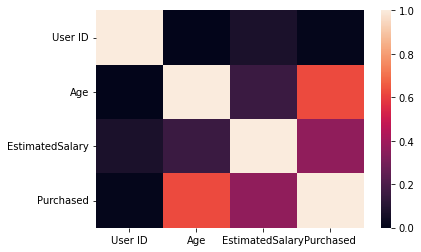

In [26]:
sns.heatmap(social_network.corr())

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [28]:
#for logistic regression
#feature scaling is done to improve the performance of our model
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression(random_state=0)
logR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred=logR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1])

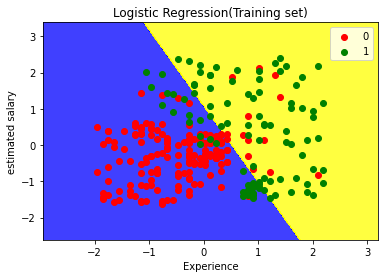

In [33]:
#visualisation of test result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()- 1,stop=X_set[:,0].max() +1,step=0.01),
                  np.arange(start=X_set[:,1].min()- 1,stop=X_set[:,1].max() +1,step=0.01))
plt.contourf(X1,X2,logR.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(("blue","yellow")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Experience')
plt.ylabel('estimated salary')
plt.legend()

plt.show()

In [35]:
#evaluate our model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[79,  6],
       [11, 38]])

values along the diagonal of confusion matrix should be maximum
Accuracy=79+38/134=0.87